## Case_I_v2 : Using chemical analysis to determine the quality wines

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [2]:
# Import dataset

wines = pd.read_csv("winequality.csv", sep = ';')

## Checking data

In [ ]:
# Checking the data format
shape = wines.shape
print('Numbers of lines and columns: {0}'.format(shape))

In [36]:
# Checking the first five lines
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Checking the last five lines
wines.tail(5)

In [ ]:
# Checking missing datas
wines.isnull().values.any()

In [ ]:
# Missing hidden values
print("# Lines in dataframe {0}".format(len(wines)))
print("# Lines missing fixed acidity: {0}".format(len(wines.loc[wines['fixed acidity'] == 0])))
print("# Lines missing volatile acidity: {0}".format(len(wines.loc[wines['volatile acidity'] == 0])))
print("# Lines missing citric acid: {0}".format(len(wines.loc[wines['citric acid'] == 0])))
print("# Lines missing residual sugar: {0}".format(len(wines.loc[wines['residual sugar'] == 0])))
print("# Lines missing chlorides: {0}".format(len(wines.loc[wines['chlorides'] == 0])))
print("# Lines missing total sulfur dioxide: {0}".format(len(wines.loc[wines['total sulfur dioxide'] == 0])))
print("# Lines missing density: {0}".format(len(wines.loc[wines['density'] == 0])))
print("# Lines missing pH: {0}".format(len(wines.loc[wines['pH'] == 0])))
print("# Lines missing sulphates: {0}".format(len(wines.loc[wines['sulphates'] == 0])))
print("# Lines missing alcohol: {0}".format(len(wines.loc[wines['alcohol'] == 0])))

In [ ]:
wines.isnull().sum()

In [ ]:
# Treating missing missing values ​​found

## from sklearn.impute import SimpleImputer
## ocultos = SimpleImputer(missing_values = 0, strategy = "mean")

In [ ]:
# Substituting values equal to zero, by the mean of the data

## X_treino = ocultos.fit_transform(X_treino)
## X_teste = ocultos.fit_transform(X_teste)

# CONCLUSION = MAY BE VALUES = 0 IN THIS ATTRIBUTE, THEREFORE, THE TREATMENT WAS NOT EXECUTED

## Exploratory data analyzis

In [ ]:
# Identifying correlation between variables

def plot_corr(wines, size = 10):
    corr = wines.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

In [ ]:
# Plot correlation

plot_corr(wines)

In [ ]:
# Viewing the correlation in table
# Correlation Coefficient:
# +1 = strong positive correlation
# 0 = no correlation
# -1 = strong negative correlation

wines.corr()

## Data Splitting

In [3]:
# Variable explanatory(Feature Selection)
atributes = wines.drop('quality', axis=1)

# Variable target
predict = wines['quality']

# Creating objects
X = atributes
y = predict

In [4]:
# Splitting of data - 75% for training data and 25% for test data
# Importing the train_test_split

from sklearn.model_selection import train_test_split

# Setting split rate
split_test_size = 0.25

# Creating test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [ ]:
# Printing results

print("{0:0.2f}% in data train.".format((len(X_train)/len(wines.index)) * 100))
print("{0:0.2f}% in data test.".format((len(X_test)/len(wines.index)) * 100))

## Lasso Regression: Building, Trainning and Checking accuracy
- Choice of algorithms was decided with the help of FlowChart from ScikitLearn (Regression algorithms)

In [7]:
# Importing the linear model 'Lasso', make pipeline and mean absolute error metrics.
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

#Creating a predict model
my_pipeline1 = make_pipeline(Lasso())

# Trainning the model
my_pipeline1.fit(X_train, y_train)

# Predicting Y based on training and test data.
predictLassotrain = my_pipeline1.predict(X_train)
predictLassotest = my_pipeline1.predict(X_test)

# Print results
scores_train_lasso = mean_absolute_error(y_train, predictLassotrain)
scores_traintestsplit = mean_absolute_error(y_test, predictLassotest)
print('Results: ')
print('Mean absolute error / Train test split / Train data: ', scores_train_lasso)
print('Mean absolute error / Train test split / Test data: ', scores_traintestsplit)

# Model with cross validation
from sklearn.model_selection import cross_val_score
cross_lasso = cross_val_score(my_pipeline1, X, y,  scoring='neg_mean_absolute_error')
print('Mean absolute error / Cross Val / Test data: ', cross_lasso.mean() * -1)
print(cross_lasso)

Results: 
Mean absolute error / Train test split / Train data:  0.6529844072314784
Mean absolute error / Train test split / Test data:  0.6468353681504646
Mean absolute error / Cross Val / Test data:  0.660230613816923
[-0.65812805 -0.67347745 -0.64908635]


## Ridge Regression: Building, Trainning and Checking accuracy

In [ ]:
# Importing the linear model 'Ridge Regression'
from sklearn.linear_model import Ridge

#Creating a predict model
my_pipeline2 = make_pipeline(Ridge())

#Fitting the model
my_pipeline2.fit(X_train, y_train)

# Predicting Y based on training and test data.
lassopredicttrain = my_pipeline2.predict(X_train)
lassopredicttest = my_pipeline2.predict(X_test)

#Results
scores_train_ridge = mean_absolute_error(y_train, lassopredicttrain)
score_test_ridge = mean_absolute_error(y_test, lassopredicttest)
print('Results: ')
print('Mean absolute error / Train test split / Train data: ', scores_train_ridge)
print('Mean absolute error / Train test split / Test data: ', score_test_ridge)

#Using Cross validation
cross_ridge = cross_val_score(my_pipeline2, X, y, scoring='neg_mean_absolute_error')
print('Mean absolute error / Cross Val / Test data: ', cross_ridge.mean() * -1)
print(cross_ridge)

## Suport Vector Regression: Building, Trainning and Checking accuracy

In [ ]:
# Importing the SVM model 'Suport Vector Regression'
from sklearn.svm import SVR

#Creating a predict model
my_pipeline3 = SVR()

# Trainning the model
my_pipeline3.fit(X_train, y_train)

# Predicting
predictSVRtrain = my_pipeline3.predict(X_train)
predictSVRtest = my_pipeline3.predict(X_test)

# Results
scores_train_SVR = mean_absolute_error(y_train, predictSVRtrain)
score_test_SVR = mean_absolute_error(y_test, predictSVRtest)
print('Results: ')
print('Mean absolute error / Train test split / Train data: ', scores_train_SVR)
print('Mean absolute error / Train test split / Test data: ', score_test_SVR)

#Using Cross validation
cross_SVR = cross_val_score(my_pipeline3, X, y, scoring='neg_mean_absolute_error')
print('Mean absolute error / Cross Val / Test data: ', cross_SVR.mean() * -1)
print(cross_SVR)

## Random Forest Regression: Building, Trainning and Checking accuracy

In [ ]:
# Importing the SVM model 'Suport Vector Regression'
from sklearn.ensemble import RandomForestRegressor

#Creating a predict model
my_pipeline4 = RandomForestRegressor()

# Trainning the model
my_pipeline4.fit(X_train, y_train)

# Predicting
predictRFtrain = my_pipeline4.predict(X_train)
predictRFtest = my_pipeline4.predict(X_test)

# Results
scores_train_RF = mean_absolute_error(y_train, predictRFtrain)
score_test_RF = mean_absolute_error(y_test, predictRFtest)
print('Results: ')
print('Mean absolute error / Train test split / Train data: ', scores_train_RF)
print('Mean absolute error / Train test split / Test data: ', score_test_RF)

#Using Cross validation
cross_RF = cross_val_score(my_pipeline4, X, y, scoring='neg_mean_absolute_error')
print('Mean absolute error / Cross Val / Test data: ', cross_RF.mean() * -1)
print(cross_RF)

## XGBoost Regressor: Building, Trainning and Checking accuracy

In [43]:
# Importing the SVM model 'Suport Vector Regression'
from xgboost import XGBRegressor

#Creating a predict model
my_pipeline5 = XGBRegressor()

# Trainning the model
my_pipeline5.fit(X_train, y_train)

# Predicting
predictXGtrain = my_pipeline5.predict(X_train)
predictXGtest = my_pipeline5.predict(X_test)

# Results
scores_train_XG = mean_absolute_error(y_train, predictXGtrain)
score_test_XG = mean_absolute_error(y_test, predictXGtest)
print('Results: ')
print('Mean absolute error / Train test split / Train data: ', scores_train_XG)
print('Mean absolute error / Train test split / Test data: ', score_test_XG)

#Using Cross validation
cross_XG = cross_val_score(my_pipeline5, X, y, scoring='neg_mean_absolute_error')
print('Mean absolute error / Cross Val / Test data: ', cross_XG.mean() * -1)
print(cross_XG)

Results: 
Mean absolute error / Train test split / Train data:  0.37843953519189627
Mean absolute error / Train test split / Test data:  0.4747589588165283
Mean absolute error / Cross Val / Test data:  0.5157572233058126
[-0.53064563 -0.50785839 -0.50876766]


#### Model Tuning
- XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed. The first parameters you should understand are:

- GridSearchCV for hyper-parameters tuning XGBoost models using Pipelines

In [23]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

my_pipeline10 = Pipeline([('xgbrg', XGBRegressor())])

param_grid = {
    "xgbrg__n_estimators": [10, 50, 100, 500],
    "xgbrg__learning_rate": [0.1, 0.5, 1],
}

fit_params = {"xgbrg__eval_set": [(X_test, y_test)], 
              "xgbrg__early_stopping_rounds": 10, 
              "xgbrg__verbose": False} 

searchCV = GridSearchCV(my_pipeline10, cv=5, param_grid=param_grid, fit_params=fit_params)
searchCV.fit(X_train, y_train)  

C:\Users\Marcos Rocha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:643: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('xgbrg', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
       fit_params={'xgbrg__eval_set': [(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7             0.560         0.08            2.50      0.114
124             7.8             0.500         0.17            1.60      0.082
350            10.7     ...: quality, Length: 400, dtype: int64)], 'xgbrg__early_stopping_rounds': 10, 'xgbrg__verbose': False},
       iid='warn', n_jobs=None,
       param_grid={'xgbrg__n_estimators': [10, 50, 100, 500], '

In [34]:
print(searchCV.best_params_)

{'xgbrg__learning_rate': 0.1, 'xgbrg__n_estimators': 50}


In [30]:
print(searchCV.cv_results_['mean_train_score'])

[-4.53374937  0.58161972  0.62322726  0.62322726  0.5567434   0.61683099
  0.61683099  0.61683099  0.5414556   0.57189637  0.57189637  0.57189637]


In [31]:
print(searchCV.cv_results_['mean_test_score'])

[-4.61989065  0.38427072  0.38019653  0.38019653  0.36660551  0.36083244
  0.36083244  0.36083244  0.28796901  0.27539071  0.27539071  0.27539071]


In [32]:
print(searchCV.cv_results_['mean_train_score'].mean(), searchCV.cv_results_['mean_test_score'].mean())

0.16322549464067507 -0.07599857604828257


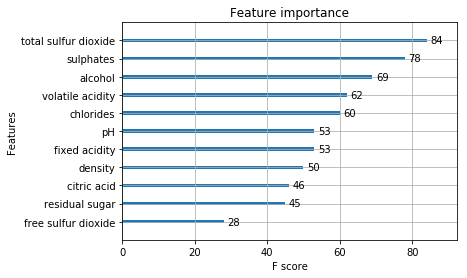

In [46]:
# Partial Dependence Plots
# Feature importance
import xgboost
xgboost.plot_importance(my_pipeline5)

In [50]:
## xgboost.plot_tree(my_pipeline5) error?

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x157acf0cef0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x157ada63e10>})

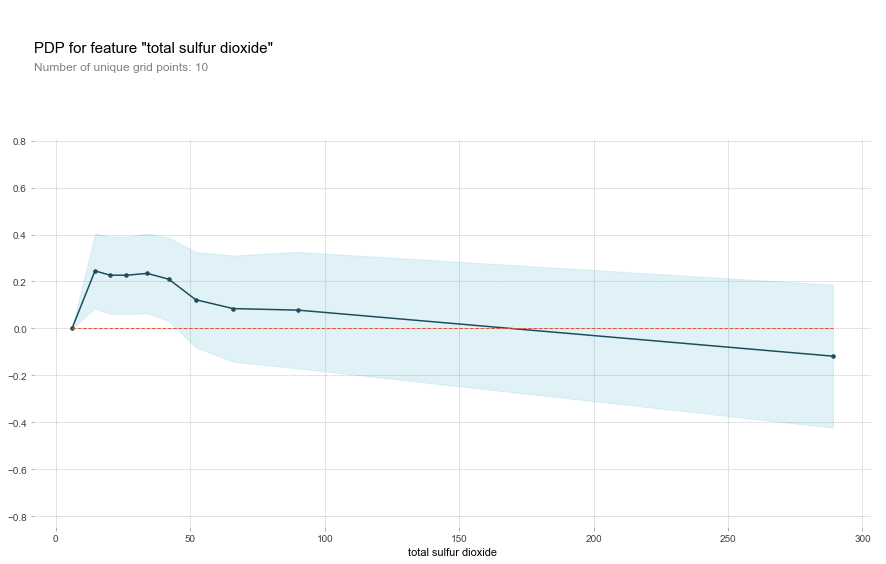

In [49]:
from pdpbox import pdp
# convert to DataFrame as pdp package requires a DataFrame
X1 = atributes
my_model = XGBRegressor()
my_model.fit(X1, y)
feature = 'total sulfur dioxide'
p = pdp.pdp_isolate(my_model, X1, X1.columns, feature)
pdp.pdp_plot(p, feature)

## Building [Data Splitting and Classification Model]

### Data Splitting and Preprocessing

In [ ]:
# Creating classes of quality
# 1-4 = Bad wines
# 5-6 = Medium wines
# 7-10 = Good wines

classes = []
for i in wines['quality']:
    if i >= 1 and i <= 4:
        classes.append('1')
    elif i >= 5 and i <= 6:
        classes.append('2')
    elif i >= 7 and i <= 10:
        classes.append('3')
wines['classes'] = classes

In [ ]:
# Defing X2 = predictive variables Y2 = variavel target
atributos2 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
classes_pred = ['classes']

X2 = wines[atributos2].values
Y2 = wines[classes_pred].values

In [ ]:
# Using Standard scaler in predictive variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2 = sc.fit_transform(X2)

In [ ]:
# Using PCA technique in predictive variables
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X2)

In [ ]:
# Plot the graph to find the principal components "8 in this case"
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [ ]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X2)

In [ ]:
# Setting split rate
split_test_size2 = 0.25

In [ ]:
# Creating test data and train data
from sklearn.model_selection import train_test_split
X_treino2, X_teste2, Y_treino2, Y_teste2 = train_test_split(x_new, Y2, test_size = split_test_size2, random_state = 42)

## KNN / SVM / Naive Bayes / DecisionTree / GradientBoosting / RandomForest / SGDC

In [ ]:
# Importing Classifier modules
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_treino2, Y_treino2.ravel())
KNN_predict_test = model_KNN.predict(X_teste2)
    
acc_KNN = accuracy_score(Y_teste2, KNN_predict_test)
print(acc_KNN)
print(confusion_matrix(Y_teste2, KNN_predict_test))

In [ ]:
print(acc_KNN)

In [ ]:
model_SVC = SVC()
model_SVC.fit(X_treino2, Y_treino2.ravel())
SVC_predict_test = model_SVC.predict(X_teste2)
    
acc_SVC = accuracy_score(Y_teste2, SVC_predict_test)
print(acc_SVC)
print(confusion_matrix(Y_teste2, SVC_predict_test))

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_treino2, Y_treino2.ravel())
NB_predict_test = model_NB.predict(X_teste2)

acc_NB = accuracy_score(Y_teste2, NB_predict_test)
print(acc_NB)
print(confusion_matrix(Y_teste2, NB_predict_test))

In [ ]:
model_XG = GradientBoostingClassifier()
model_XG.fit(X_treino2, Y_treino2.ravel())
XG_predict_test = model_XG.predict(X_teste2)

acc_XG = accuracy_score(Y_teste2, XG_predict_test)
print(acc_XG)
print(confusion_matrix(Y_teste2, XG_predict_test))

In [ ]:
model_SDG = SGDClassifier()
model_SDG.fit(X_treino2, Y_treino2.ravel())
SDG_predict_test = model_SDG.predict(X_teste2)

acc_SDG = accuracy_score(Y_teste2, SDG_predict_test)
print(acc_SDG)
print(confusion_matrix(Y_teste2, SDG_predict_test))

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_treino2, Y_treino2.ravel())
DT_predict_test = model_DT.predict(X_teste2)

acc_DT = accuracy_score(Y_teste2, DT_predict_test)
print(acc_DT)
print(confusion_matrix(Y_teste2, DT_predict_test))

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_treino2, Y_treino2.ravel())
RF_predict_test = model_RF.predict(X_teste2)

acc_RF = accuracy_score(Y_teste2, RF_predict_test)
print(acc_RF)
print(confusion_matrix(Y_teste2, RF_predict_test))

## Resume

In [ ]:
accuracy = [acc_KNN, acc_SVC, acc_NB, acc_XG, acc_SDG, acc_DT, acc_RF]
classifier = ['KNearestNeightbors','Support Vector Machine','Naive Bayes','Gradient Booster', 'SGDClassifier','Decision Tree','Random Forest']
explain = [explain_SVR, explain_RP, explain_Lasso]
regression = ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']

In [ ]:
c={'Classifier Model':classifier,'Accuracy':accuracy}
r={'Regression Model':regression, 'Explained Variance':explain}

In [ ]:
acc_df=pd.DataFrame(c)
acc_df

In [ ]:
exp_df=pd.DataFrame(r)
exp_df